In [1]:
import pandas as pd

In [2]:
import numpy as np


In [3]:
df = pd.read_csv('df.csv')

In [4]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [5]:
data = df[['T2','T6']]

In [6]:
data.head()

,T2,T6
0,19.2,7.026667
1,19.2,6.833333
2,19.2,6.560000
3,19.2,6.433333
4,19.2,6.366667


In [52]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
norm = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)



from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)



x_train = x_train.to_numpy()
y_train = y_train.to_numpy()
x_test = x_test.to_numpy()

In [55]:
from sklearn.linear_model import LinearRegression


x_train = x_train.reshape(-1,1)
y_train = y_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)


model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [56]:
y_pred = model.predict(x_test)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


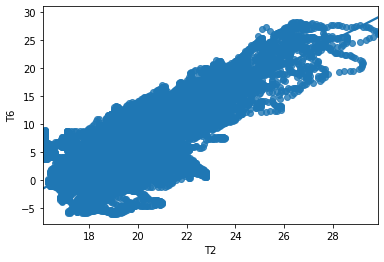

In [11]:
import seaborn as sns
sns.regplot('T2','T6', data=data, )

In [57]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
round(mae, 3)

2.823

In [58]:
from sklearn.metrics import r2_score

r2_score = r2_score(y_test, y_pred)
round(r2_score, 3)

0.643

In [40]:

y_pred = y_pred.reshape(-1,1)

In [59]:
y_test = y_test.to_numpy()

y_test = y_test.reshape(-1,1)

In [60]:
rss = np.sum(np.square(y_test - y_pred))
round(rss, 3)

78033.972

In [61]:
from sklearn.metrics import  mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
round(rmse, 3)

3.63